# Восстановление золота из руды

**Постановка задачи**

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.
Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 
Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.
Вам нужно:
Подготовить данные;
Провести исследовательский анализ данных;
Построить и обучить модель.
Чтобы выполнить проект, обращайтесь к библиотекам pandas, matplotlib и sklearn. Вам поможет их документация.
Следующий урок посвящён технологическому процессу очистки руды. Решите сами, какие детали нужны для построения модели, а какие — нет.

**Цель исследования.**
    
Провести анализ данных и помочь предприятию оптимизировать производство,разработав модель, прелсказывающую коэффициент восстановления золота из золотосодержащей руды.

**Технологический процесс**
  
Когда добытая руда проходит первичную обработку, получается дроблёная смесь. Её отправляют на флотацию (обогащение) и двухэтапную очистку.
1. Флотация
Во флотационную установку подаётся смесь золотосодержащей руды. После обогащения получается черновой концентрат и «отвальные хвосты», то есть остатки продукта с низкой концентрацией ценных металлов.
На стабильность этого процесса влияет непостоянное и неоптимальное физико-химическое состояние флотационной пульпы (смеси твёрдых частиц и жидкости).
2. Очистка 
Черновой концентрат проходит две очистки. На выходе получается финальный концентрат и новые отвальные хвосты.

**Описание данных**

*Технологический процесс*
-Rougher feed — исходное сырье
-Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
-Xanthate — ксантогенат (промотер, или активатор флотации);
-Sulphate — сульфат (на данном производстве сульфид натрия);
-Depressant — депрессант (силикат натрия).
-Rougher process (англ. «грубый процесс») — флотация
-Rougher tails — отвальные хвосты
-Float banks — флотационная установка
-Cleaner process — очистка
-Rougher Au — черновой концентрат золота
-Final Au — финальный концентрат золота

*Параметры этапов*
-air amount — объём воздуха
-fluid levels — уровень жидкости
-feed size — размер гранул сырья
-feed rate — скорость подачи

*Наименование признаков*
Наименование признаков должно быть такое:
[этап].[тип_параметра].[название_параметра]
Пример: rougher.input.feed_ag

Возможные значения для блока [этап]:
-rougher — флотация
-primary_cleaner — первичная очистка
-secondary_cleaner — вторичная очистка
-final — финальные характеристики

Возможные значения для блока [тип_параметра]:
-input — параметры сырья
-output — параметры продукта
-state — параметры, характеризующие текущее состояние этапа
-calculation — расчётные характеристики

**Исходные данные**

 Данные находятся в трёх файлах:

-gold_recovery_train_new.csv — обучающая выборка;

-gold_recovery_test_new.csv — тестовая выборка;

-gold_recovery_full_new.csv — исходные данные.

Данные индексируются датой и временем получения информации (признак date). Соседние по времени параметры часто похожи.
Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.
Исходный датасет содержит обучающую и тестовую выборки со всеми признаками.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Откроем-файлы-и-изучим-их." data-toc-modified-id="Откроем-файлы-и-изучим-их.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Откроем файлы и изучим их.</a></span></li><li><span><a href="#Проверим,-что-эффективность-обогащения-рассчитана-правильно.-Вычислим-её-на-обучающей-выборке-для-признака-rougher.output.recovery." data-toc-modified-id="Проверим,-что-эффективность-обогащения-рассчитана-правильно.-Вычислим-её-на-обучающей-выборке-для-признака-rougher.output.recovery.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery.</a></span></li><li><span><a href="#Проанализируем-признаки,-недоступные-в-тестовой-выборке." data-toc-modified-id="Проанализируем-признаки,-недоступные-в-тестовой-выборке.-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Проанализируем признаки, недоступные в тестовой выборке.</a></span></li><li><span><a href="#Проведем-предобработку-данных." data-toc-modified-id="Проведем-предобработку-данных.-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Проведем предобработку данных.</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Посмотрим,-как-меняется-концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки." data-toc-modified-id="Посмотрим,-как-меняется-концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.</a></span></li><li><span><a href="#2.2.--Сравним-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках.-Если-распределения-сильно-отличаются-друг-от-друга,-оценка-модели-будет-неправильной." data-toc-modified-id="2.2.--Сравним-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках.-Если-распределения-сильно-отличаются-друг-от-друга,-оценка-модели-будет-неправильной.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>2.2.  Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.</a></span></li><li><span><a href="#2.3.-Исследуем-суммарную-концентрацию-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах." data-toc-modified-id="2.3.-Исследуем-суммарную-концентрацию-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>2.3. Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#3.1.-Напишите-функцию-для-вычисления-итоговой-sMAPE." data-toc-modified-id="3.1.-Напишите-функцию-для-вычисления-итоговой-sMAPE.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>3.1. Напишите функцию для вычисления итоговой sMAPE.</a></span></li><li><span><a href="#Обучим-разные-модели-и-оценим-их-качество.-Выберем-лучшую-модель-и-проверим-её-на-тестовой-выборке." data-toc-modified-id="Обучим-разные-модели-и-оценим-их-качество.-Выберем-лучшую-модель-и-проверим-её-на-тестовой-выборке.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучим разные модели и оценим их качество. Выберем лучшую модель и проверим её на тестовой выборке.</a></span></li></ul></li><li><span><a href="#Итоговый-вывод" data-toc-modified-id="Итоговый-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Итоговый вывод</a></span></li></ul></div>

## Подготовка данных

In [9]:
!pip install jupyter-black -q

In [13]:
import jupyter_black

jupyter_black.load()

In [14]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as pl
import seaborn as sns
import warnings
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.dummy import DummyRegressor


# warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

### Откроем файлы и изучим их.

In [19]:
try:
    df_train = pd.read_csv(
        "Desktop/Аналитик данных/Проекты/Итоговый проект/gold_recovery_full_new.csv"
    )
    df_test = pd.read_csv(
        "Desktop/Аналитик данных/Проекты/Итоговый проект/gold_recovery_test_new.csv"
    )
    df_full = pd.read_csv(
        "Desktop/Аналитик данных/Проекты/Итоговый проект/gold_recovery_train_new.csv"
    )
except:
    df_train = pd.read_csv(
        "https://code.s3.yandex.net/datasets/gold_recovery_train_new.csv"
    )
    df_test = pd.read_csv(
        "https://code.s3.yandex.net/datasets/gold_recovery_test_new.csv"
    )
    df_full = pd.read_csv(
        "https://code.s3.yandex.net/datasets/gold_recovery_full_new.csv"
    )

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [26]:
df_train.head(3)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

In [27]:
df_train.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,14117.000000,14149.000000,14049.000000,14149.000000,14063.000000,13863.000000,14149.000000,14148.000000,14134.000000,14103.000000,14149.000000,14145.000000,14148.000000,14145.000000,14148.000000,14147.000000,14148.000000,14146.000000,14148.000000,1.414800e+04,14148.000000,14148.000000,14149.000000,14149.000000,14049.000000,14141.000000,14005.000000,14071.000000,14149.000000,14120.000000,14141.000000,14113.000000,13721.000000,14149.000000,14149.000000,14127.000000,14149.000000,14149.000000,14148.000000,14149.000000,14149.000000,14149.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14149.000000,14149.000000,13713.000000,14149.000000,14149.000000,14149.000000,14147.000000,14139.000000,12544.000000,14149.000000,13932.000000,14148.000000,14128.000000,14148.000000,14145.000000,14148.000000,14148.000000,14148.000000,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148

###  Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery. 

Эффективность обогащения рассчитывается по формуле
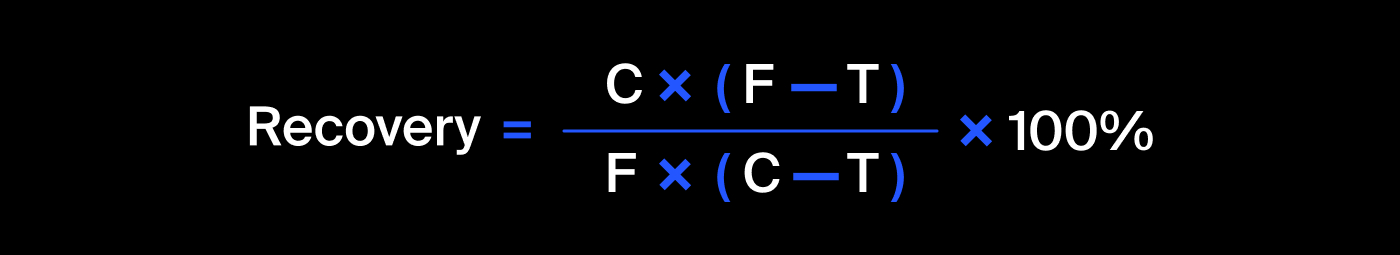e
где:
C — доля золота в концентрате после флотации/очистки;
F — доля золота в сырье/концентрате до флотации/очистки;
T — доля золота в отвальных хвостах после флотации/очистки.

In [32]:
f = df_train["rougher.input.feed_au"]
c = df_train["rougher.output.concentrate_au"]
t = df_train["rougher.output.tail_au"]

In [33]:
recovery = (c * (f - t)) / (f * (c - t)) * 100
print(recovery.describe())

count    14149.000000
mean        82.704502
std         14.479156
min         -0.000000
25%         79.993067
50%         85.299462
75%         90.165021
max        100.000000
dtype: float64


In [34]:
print(df_train["rougher.output.recovery"].describe())

count    14149.000000
mean        82.704502
std         14.479156
min          0.000000
25%         79.993067
50%         85.299462
75%         90.165021
max        100.000000
Name: rougher.output.recovery, dtype: float64


Вывод: данные в точности совпадают, а значит, эффективность обогащения рассчитана правильно

Найдем MAE между полученными расчётами и значением признака.

In [38]:
mean_absolute_error(recovery, df_train["rougher.output.recovery"])

9.73512347450521e-15

###  Проанализируем признаки, недоступные в тестовой выборке.

In [40]:
print(df_train.shape)
print(df_test.shape)

(14149, 87)
(5290, 53)


В тестовой выборке отсутствует 34 столбца. Найдем недостающие столбцы:

In [42]:
set(df_train).symmetric_difference(set(df_test))

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Видим, что в тестовой выборке отсутствуют параметры продукта (output) и расчетные характеристики (calculation).

### Проведем предобработку данных.

Проверим на дубликаты м мзучим пропуски в данных.

Для удобства обработки создадим список из датафреймов

In [48]:
df_all = [df_train, df_test, df_full]
for df in df_all:
    print(df.duplicated().sum())

0
0
0


In [51]:
df_all = [df_train, df_test, df_full]
for df in df_all:
    print(df.isna().sum())

date                                                     0
final.output.concentrate_ag                              1
final.output.concentrate_pb                              1
final.output.concentrate_sol                           211
final.output.concentrate_au                              0
final.output.recovery                                    0
final.output.tail_ag                                     0
final.output.tail_pb                                   100
final.output.tail_sol                                    5
final.output.tail_au                                     0
primary_cleaner.input.sulfate                           20
primary_cleaner.input.depressant                        32
primary_cleaner.input.feed_size                          0
primary_cleaner.input.xanthate                         100
primary_cleaner.output.concentrate_ag                    0
primary_cleaner.output.concentrate_pb                   86
primary_cleaner.output.concentrate_sol                 2

В условияъ задания указано: "Данные индексируются датой и временем получения информации (признак date). Соседние по времени параметры часто похожи". Отсортируем датафреймы по дате в порядке возрастания и заполним пропуски соcедними по дате значениями в столбце. Для этого переведем формат даты из object в datetime и расположим датафреймы в порядке возрастания даты, а далее заполним пропуски значением предыдущих замеров.

In [53]:
df_full["date"] = pd.to_datetime(df_full["date"], format="%Y-%m-%d %H:%M:%S")

In [54]:
df_test["date"] = pd.to_datetime(df_test["date"], format="%Y-%m-%d %H:%M:%S")

In [55]:
df_train["date"] = pd.to_datetime(df_train["date"], format="%Y-%m-%d %H:%M:%S")

In [56]:
df_test = df_test.sort_values(by="date")

In [57]:
df_train = df_train.sort_values(by="date")

In [58]:
df_full = df_full.sort_values(by="date")

In [59]:
df_test = df_test.sort_values(by="date")

In [60]:
df_train = df_train.fillna(method="ffill")
df_test = df_test.fillna(method="ffill")
df_full = df_full.fillna(method="ffill")

C:\Users\rubts\AppData\Local\Temp\ipykernel_18084\1189372212.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_train = df_train.fillna(method="ffill")
C:\Users\rubts\AppData\Local\Temp\ipykernel_18084\1189372212.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_test = df_test.fillna(method="ffill")
C:\Users\rubts\AppData\Local\Temp\ipykernel_18084\1189372212.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_full = df_full.fillna(method="ffill")


In [62]:
df_full.isna().sum()

date                                                  0
final.output.concentrate_ag                           0
final.output.concentrate_pb                           0
final.output.concentrate_sol                          0
final.output.concentrate_au                           0
final.output.recovery                                 0
final.output.tail_ag                                  0
final.output.tail_pb                                  0
final.output.tail_sol                                 0
final.output.tail_au                                  0
primary_cleaner.input.sulfate                         0
primary_cleaner.input.depressant                      0
primary_cleaner.input.feed_size                       0
primary_cleaner.input.xanthate                        0
primary_cleaner.output.concentrate_ag                 0
primary_cleaner.output.concentrate_pb                 0
primary_cleaner.output.concentrate_sol                0
primary_cleaner.output.concentrate_au           

Пропуски заполнены.

## Анализ данных

### Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. 

In [66]:
has_output = df_full.columns.str.contains("output.concentrate")
has_rougher = df_full.columns.str.contains("rougher.input.feed")
has_sol = df_full.columns.str.contains("sol")

column_names = df_full.columns[(has_output | has_rougher) & ~has_sol].tolist()

print(column_names)

['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_au', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_rate', 'rougher.input.feed_size', 'rougher.input.feed_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_au']


In [67]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                19439 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         19439 non-null  float64       
 2   final.output.concentrate_pb                         19439 non-null  float64       
 3   final.output.concentrate_sol                        19439 non-null  float64       
 4   final.output.concentrate_au                         19439 non-null  float64       
 5   final.output.recovery                               19439 non-null  float64       
 6   final.output.tail_ag                                19439 non-null  float64       
 7   final.output.tail_pb                                19439 non-null  float64       
 8   final.

In [68]:
ag = df_full[
    [
        "rougher.input.feed_ag",
        "rougher.output.concentrate_ag",
        "primary_cleaner.output.concentrate_ag",
        "final.output.concentrate_ag",
    ]
]
ag.columns = [
    "концентрация перед флотацией",
    "флотация",
    "первичная очистка",
    "финальная очистка",
]

In [71]:
pb = df_full[
    [
        "rougher.input.feed_pb",
        "rougher.output.concentrate_pb",
        "primary_cleaner.output.concentrate_pb",
        "final.output.concentrate_pb",
    ]
]
pb.columns = [
    "концентрация перед флотацией",
    "флотация",
    "первичная очистка",
    "финальная очистка",
]

In [72]:
au = df_full[
    [
        "rougher.input.feed_au",
        "rougher.output.concentrate_au",
        "primary_cleaner.output.concentrate_au",
        "final.output.concentrate_au",
    ]
]
au.columns = [
    "концентрация перед флотацией",
    "флотация",
    "первичная очистка",
    "финальная очистка",
]

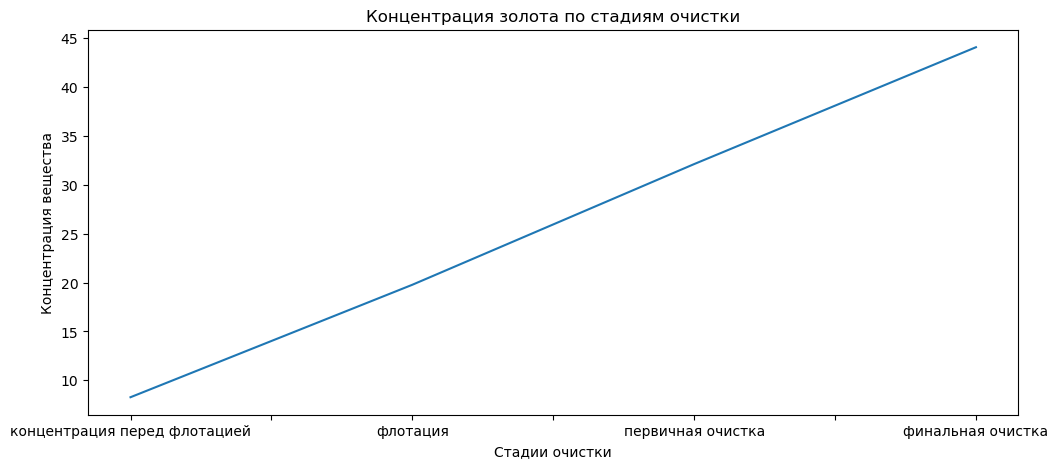

In [73]:
au.mean().plot(figsize=(12, 5))
pl.title("Концентрация золота по стадиям очистки")
pl.xlabel("Стадии очистки")
pl.ylabel("Концентрация вещества")
pl.show()

Спасибо!) меня в предыдущих проектах за это гоняли))) я все вспомнить не могла, как убрать тех.комментарии, в итоге заметила,что pl.show() их тоже убирает

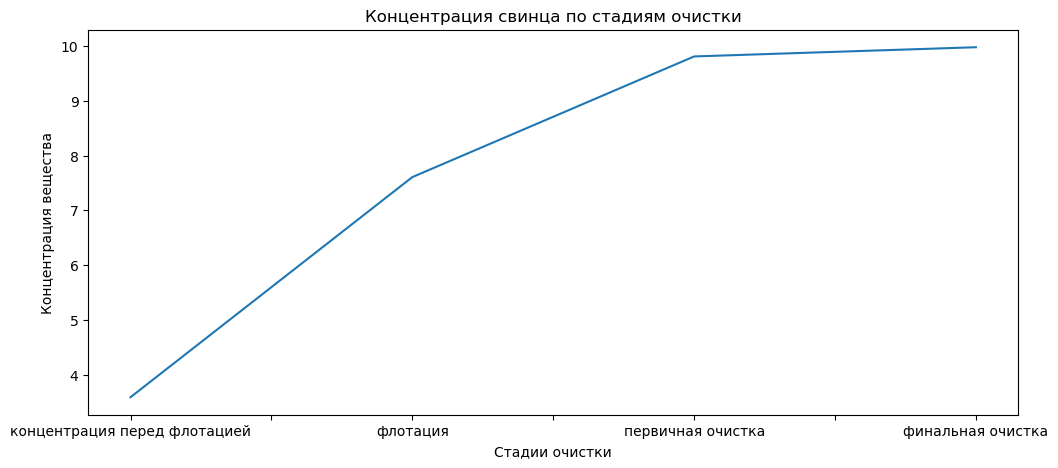

In [75]:
pb.mean().plot(figsize=(12, 5))
pl.title("Концентрация свинца по стадиям очистки")
pl.xlabel("Стадии очистки")
pl.ylabel("Концентрация вещества")
pl.show()

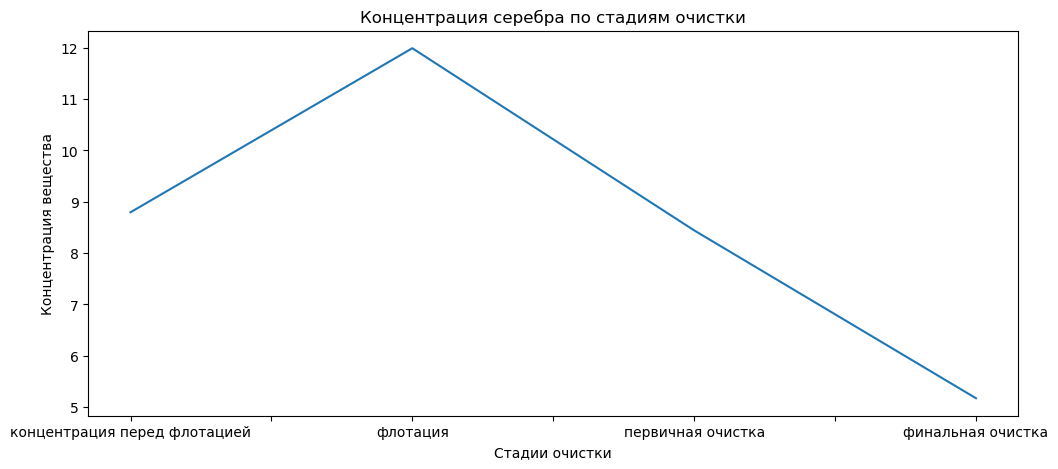

In [76]:
ag.mean().plot(figsize=(12, 5))
pl.title("Концентрация серебра по стадиям очистки")
pl.xlabel("Стадии очистки")
pl.ylabel("Концентрация вещества")
pl.show()

На графиках видно, что концентрация золота равномерно растет по стадиям очистки, серебра- растет до флотации, а затем равномерно падает, а концентрация свинца растет, но с каждой стадией очистки рост замедляется.

### 2.2.  Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

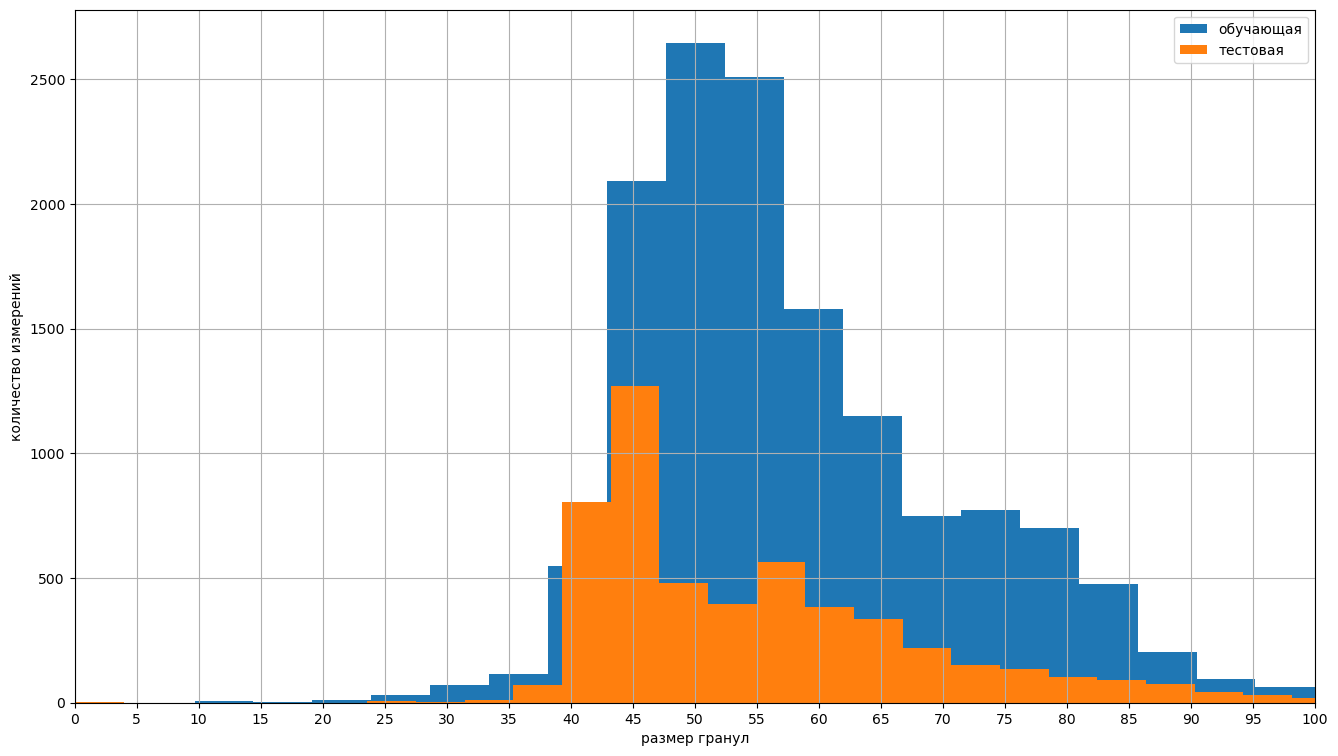

In [80]:
df_train["rougher.input.feed_size"].hist(
    bins=100, figsize=(12, 5), grid=True, label="обучающая"
)
df_test["rougher.input.feed_size"].hist(
    bins=100, figsize=(16, 9), grid=True, label="тестовая"
)
pl.xlabel("размер гранул")
pl.ylabel("количество измерений")
pl.xlim(0, 100)
min_x = 0
max_x = 100
pl.xticks(np.arange(min_x, max_x + 1, 5.0), fontsize=10)
pl.legend()
pl.show()

Мы видим, что не смотря на существенное в количестве измерений, в целом распределения на графике схожи, но но на тестовой выборке преобладают гранулы меньшего размера. Поэтому дополнительно проведем ttest.

In [83]:
st.ttest_ind(df_train["rougher.input.feed_size"], df_test["rougher.input.feed_size"])

TtestResult(statistic=12.08821642331028, pvalue=1.6081245670851643e-33, df=19437.0)

В нашем случае p-value \(8.03 \times 10^{-32}\) намного меньше любого из традиционно используемых уровней значимости (0.05, 0.01, 0.001). Это говорит о том, что результат статистически значим, и можно отвергнуть нулевую гипотезу.

Таким образом, мы можем сделать вывод, что результат теста является статистически значимым.

### 2.3. Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. 

Для этого добавим в датафрейм df_full новые столбцы.

In [88]:
df_full["rougher.output"] = (
    df_full["rougher.output.concentrate_ag"]
    + df_full["rougher.output.concentrate_pb"]
    + df_full["rougher.output.concentrate_au"]
)

In [89]:
df_full["primary_cleaner.output"] = (
    df_full["primary_cleaner.output.concentrate_ag"]
    + df_full["primary_cleaner.output.concentrate_pb"]
    + df_full["primary_cleaner.output.concentrate_au"]
)

In [90]:
df_full["final.output"] = (
    df_full["final.output.concentrate_ag"]
    + df_full["final.output.concentrate_pb"]
    + df_full["final.output.concentrate_au"]
)

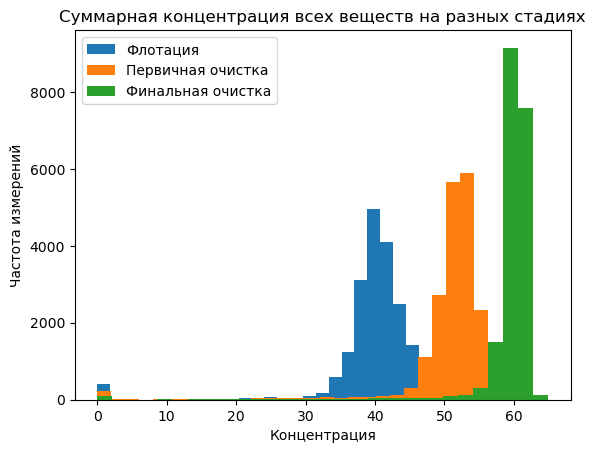

In [91]:
columns = [
    ("rougher.output", "Флотация"),
    ("primary_cleaner.output", "Первичная очистка"),
    ("final.output", "Финальная очистка"),
]

for column_name, label in columns:
    pl.hist(df_full[column_name], bins=30, label=label)

pl.title("Суммарная концентрация всех веществ на разных стадиях")
pl.xlabel("Концентрация")
pl.ylabel("Частота измерений")
pl.legend()
pl.show()

Мы видим, что на всех стадиях есть нулевые значения веществ и больше всего их на этапе флотации, меньше всего на этапе финальной. В целом концентрация вещества растет по мере очистки на каждой стадии. Максимальная концентрация достигается на финальной стадии.

Рассмотри поближе нулевые значения концентрации:

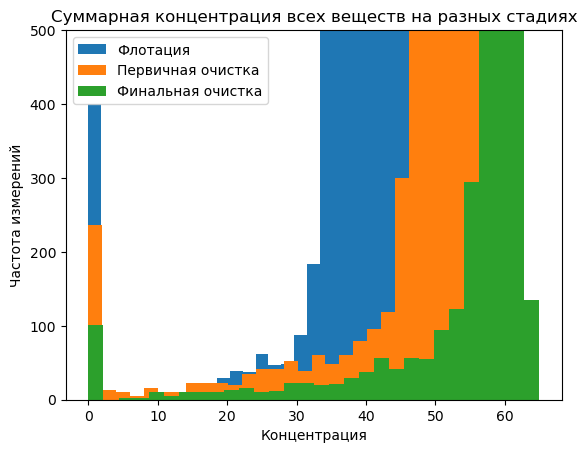

In [95]:
for column_name, label in columns:
    pl.hist(df_full[column_name], bins=30, label=label)

pl.title("Суммарная концентрация всех веществ на разных стадиях")
pl.xlabel("Концентрация")
pl.ylabel("Частота измерений")
pl.ylim(0, 500)
pl.legend()
pl.show()

Видно,что наибольшее количество нулевых значений возникает на этапе флотации, наименьшее - на этапе финальной очистки. Причины нам не известны,но нулевой концентрации металла быть не может, поэтому эти данные удалим,как аномалии.

In [99]:
columns_to_check = [
    "final.output.concentrate_ag",
    "final.output.concentrate_pb",
    "final.output.concentrate_au",
    "primary_cleaner.output.concentrate_ag",
    "primary_cleaner.output.concentrate_pb",
    "primary_cleaner.output.concentrate_au",
    "rougher.output.concentrate_ag",
    "rougher.output.concentrate_pb",
    "rougher.output.concentrate_au",
]

df_full = df_full[(df_full[columns_to_check] > 1).all(axis=1)]
df_train = df_train[(df_train[columns_to_check] > 1).all(axis=1)]

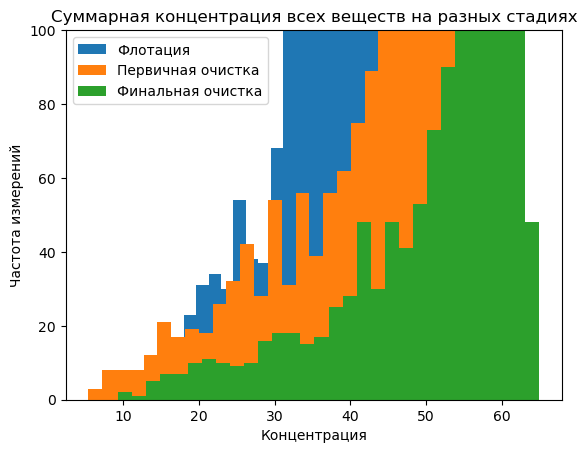

In [100]:
for column_name, label in columns:
    pl.hist(df_full[column_name], bins=30, label=label)

pl.title("Суммарная концентрация всех веществ на разных стадиях")
pl.xlabel("Концентрация")
pl.ylabel("Частота измерений")
pl.ylim(0, 100)
pl.legend()
pl.show()

## Модель

### 3.1. Напишите функцию для вычисления итоговой sMAPE.

Для начала подготовим данные и выборки, определим целм и признаки.

In [104]:
columns_not_in_test = set(df_train.columns) - set(df_test.columns)
columns_not_in_test

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

In [105]:
df_test = df_test.drop("date", axis=1)
df_train = df_train.drop("date", axis=1)
df_full = df_full.drop("date", axis=1)

Добавии недостающие целевые признаки в тестовую выборку и удалим лишние столбцы из обучающей.

In [107]:
df_test[["final.output.recovery", "rougher.output.recovery"]] = df_train[
    ["final.output.recovery", "rougher.output.recovery"]
]

In [108]:
df_test = df_test.dropna(subset=["final.output.recovery", "rougher.output.recovery"])

In [109]:
df_train = df_train.drop(
    columns=[
        "final.output.concentrate_ag",
        "final.output.concentrate_au",
        "final.output.concentrate_pb",
        "final.output.concentrate_sol",
        "final.output.tail_ag",
        "final.output.tail_au",
        "final.output.tail_pb",
        "final.output.tail_sol",
        "primary_cleaner.output.concentrate_ag",
        "primary_cleaner.output.concentrate_au",
        "primary_cleaner.output.concentrate_pb",
        "primary_cleaner.output.concentrate_sol",
        "primary_cleaner.output.tail_ag",
        "primary_cleaner.output.tail_au",
        "primary_cleaner.output.tail_pb",
        "primary_cleaner.output.tail_sol",
        "rougher.calculation.au_pb_ratio",
        "rougher.calculation.floatbank10_sulfate_to_au_feed",
        "rougher.calculation.floatbank11_sulfate_to_au_feed",
        "rougher.calculation.sulfate_to_au_concentrate",
        "rougher.output.concentrate_ag",
        "rougher.output.concentrate_au",
        "rougher.output.concentrate_pb",
        "rougher.output.concentrate_sol",
        "rougher.output.tail_ag",
        "rougher.output.tail_au",
        "rougher.output.tail_pb",
        "rougher.output.tail_sol",
        "secondary_cleaner.output.tail_ag",
        "secondary_cleaner.output.tail_au",
        "secondary_cleaner.output.tail_pb",
        "secondary_cleaner.output.tail_sol",
    ]
)

In [110]:
columns_not_in_test = set(df_full.columns) - set(df_test.columns)
columns_not_in_test

{'final.output',
 'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.

In [111]:
df_full = df_full.drop(
    columns=[
        "final.output",
        "final.output.concentrate_ag",
        "final.output.concentrate_au",
        "final.output.concentrate_pb",
        "final.output.concentrate_sol",
        "final.output.tail_ag",
        "final.output.tail_au",
        "final.output.tail_pb",
        "final.output.tail_sol",
        "primary_cleaner.output",
        "primary_cleaner.output.concentrate_ag",
        "primary_cleaner.output.concentrate_au",
        "primary_cleaner.output.concentrate_pb",
        "primary_cleaner.output.concentrate_sol",
        "primary_cleaner.output.tail_ag",
        "primary_cleaner.output.tail_au",
        "primary_cleaner.output.tail_pb",
        "primary_cleaner.output.tail_sol",
        "rougher.calculation.au_pb_ratio",
        "rougher.calculation.floatbank10_sulfate_to_au_feed",
        "rougher.calculation.floatbank11_sulfate_to_au_feed",
        "rougher.calculation.sulfate_to_au_concentrate",
        "rougher.output",
        "rougher.output.concentrate_ag",
        "rougher.output.concentrate_au",
        "rougher.output.concentrate_pb",
        "rougher.output.concentrate_sol",
        "rougher.output.tail_ag",
        "rougher.output.tail_au",
        "rougher.output.tail_pb",
        "rougher.output.tail_sol",
        "secondary_cleaner.output.tail_ag",
        "secondary_cleaner.output.tail_au",
        "secondary_cleaner.output.tail_pb",
        "secondary_cleaner.output.tail_sol",
    ]
)

In [113]:
features_test = df_test.drop(
    ["final.output.recovery", "rougher.output.recovery"], axis=1
)
target_test_f = df_test["final.output.recovery"]
target_test_r = df_test["rougher.output.recovery"]

In [114]:
features = df_train.drop(["final.output.recovery", "rougher.output.recovery"], axis=1)
target = df_train[["final.output.recovery", "rougher.output.recovery"]]

features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.3, random_state=12345
)

In [115]:
target_train_f = target_train["final.output.recovery"]
target_train_r = target_train["rougher.output.recovery"]
target_valid_f = target_valid["final.output.recovery"]
target_valid_r = target_valid["rougher.output.recovery"]

In [118]:
display(features_train.shape)
display(target_train_r.shape)
display(target_train_f.shape)

display(features_test.shape)
display(target_test_r.shape)
display(target_test_f.shape)

display(features_valid.shape)
display(target_valid_r.shape)
display(target_valid_f.shape)

(9489, 52)

(9489,)

(9489,)

(5191, 52)

(5191,)

(5191,)

(4067, 52)

(4067,)

(4067,)

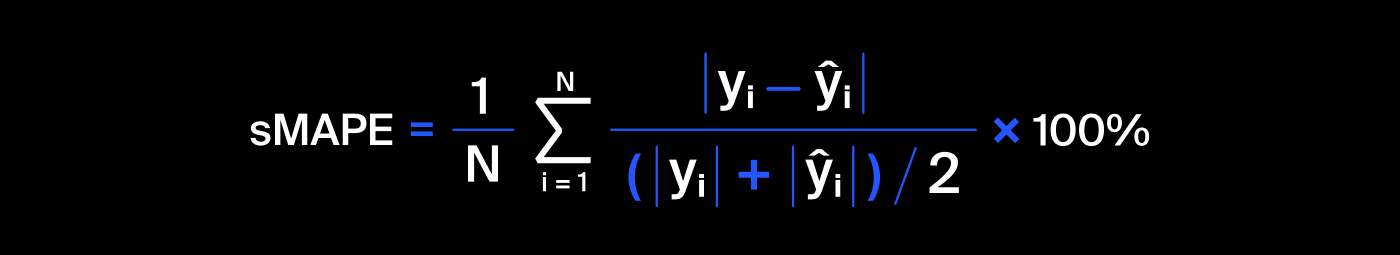

Загрузим функцию sMAPE и воспользуемся symmetric_mean_absolute_percentage_error из scipy.stats.

In [121]:
def smape(target, predicted):
    return (
        1
        / len(target)
        * np.sum(
            np.abs(target - predicted)
            / ((np.abs(target) + np.abs(predicted)) / 2)
            * 100
        )
    )

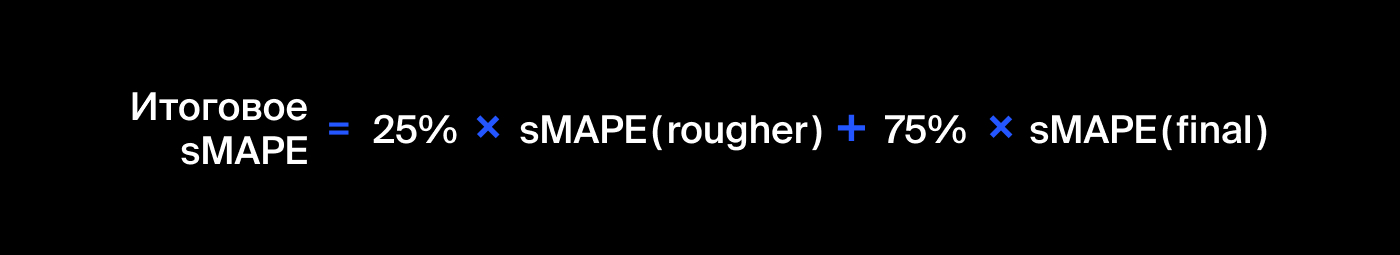

In [123]:
def final_smape(smape_rougher, smape_final):
    final_smape = 0.25 * smape_rougher + 0.75 * smape_final
    return final_smape

###  Обучим разные модели и оценим их качество. Выберем лучшую модель и проверим её на тестовой выборке. 

**Дерево решений**

rougher.output.recovery:

In [166]:
best_smape_dt_r = float("inf")
best_depth_dt_r = None

for depth in range(1, 61, 2):
    model = DecisionTreeRegressor(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train_r)
    predictions_valid_r = model.predict(features_valid)
    smape_dt_r = smape(target_valid_r, predictions_valid_r)

    if smape_dt_r < best_smape_dt_r:
        best_smape_dt_r = smape_dt_r
        best_depth_dt_r = depth
print(
    f"sMAPE по модели Дерево решений для этапа флотации равно {best_smape_dt_r} при глубине {best_depth_dt_r}"
)

sMAPE по модели Дерево решений для этапа флотации равно 3.6257851842610433 при глубине 13


final.output.recovery:

In [164]:
best_smape_dt_f = float("inf")
best_depth_dt_f = None

for depth in range(1, 61, 2):
    model = DecisionTreeRegressor(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train_f)
    predictions_valid_f = model.predict(features_valid)
    smape_dt_f = smape(target_valid_f, predictions_valid_f)

    if smape_dt_f < best_smape_dt_f:
        best_smape_dt_f = smape_dt_f
        best_depth_dt_f = depth
print(
    f"sMAPE по модели Дерево решений для этапа финальной очистки равно {best_smape_dt_f} при глубине {best_depth_dt_f}"
)

sMAPE по модели Дерево решений для этапа финальной очистки равно 7.382109477874381 при глубине 9


In [167]:
final_smape_dt = final_smape(best_smape_dt_r, best_smape_dt_f)
print(
    f"Итоговое sMAPE по модели Дерево решений равно: {final_smape_dt:.4f} при глубине {best_depth_dt_f} для final,{best_depth_dt_r} для rougher"
)

Итоговое sMAPE по модели Дерево решений равно: 6.4430 при глубине 9 для final,13 для rougher


**Линейная регрессия**

final.output.recovery:

In [136]:
model = LinearRegression()
model.fit(features_train, target_train_f)
predictions_valid_f = model.predict(features_valid)
smape_lr_f = smape(predictions_valid_f, target_valid_f)

print(
    f"sMAPE по модели линейной регрессии для этапа финальной очистки равно {smape_lr_f}"
)

sMAPE по модели линейной регрессии для этапа финальной очистки равно 8.024993918226237


rougher.output.recovery:

In [138]:
model = LinearRegression()
model.fit(features_train, target_train_r)
predictions_valid_r = model.predict(features_valid)
smape_lr_r = smape(predictions_valid_r, target_valid_r)

print(f"sMAPE по модели линейной регрессии для этапа флотации равно {smape_lr_r}")

sMAPE по модели линейной регрессии для этапа флотации равно 4.5770936885204


In [139]:
final_smape_lr = final_smape(smape_lr_r, smape_lr_f)
print(f"Итоговое sMAPE по модели Линейной регрессии равно: {final_smape_lr:.4f}")

Итоговое sMAPE по модели Линейной регрессии равно: 7.1630


**Случайный лес**

final.output.recovery:

In [142]:
# переведен в row, так как тратит очень много времени на загрузку

best_smape_rf_f = float("inf")
best_params = (None, None)

for est in range(10, 101, 10):
    for depth in range(1, 14, 2):
        model = RandomForestRegressor(
            random_state=12345, n_estimators=est, max_depth=depth
        )
        model.fit(features_train, target_train_f)
        predictions_valid = model.predict(features_valid)
        smape_rf_f = smape(predictions_valid, target_valid_f)

        if smape_rf_f < best_smape_rf_f:
            best_smape_rf_f = smape_rf_f
            best_params = (est, depth)

print(
    f"Минимальный sMAPE: достигнут при n_estimators: {best_params[0]}, max_depth: {best_params[1]}, sMAPE: {best_smape_rf_f}"
)

Минимальный sMAPE: достигнут при n_estimators: 60, max_depth: 13, sMAPE: 6.1299041693478005


rougher.output.recovery:

In [147]:
best_smape_rf_r = float("inf")
best_params = (None, None)

for est in range(10, 101, 10):
    for depth in range(1, 14, 2):
        model = RandomForestRegressor(
            random_state=12345, n_estimators=est, max_depth=depth
        )
        model.fit(features_train, target_train_r)
        predictions_valid = model.predict(features_valid)
        smape_rf_r = smape(predictions_valid, target_valid_r)

        if smape_rf_r < best_smape_rf_r:
            best_smape_rf_r = smape_rf_r
            best_params = (est, depth)

print(
    f"Минимальный sMAPE rough: достигнут при n_estimators: {best_params[0]}, max_depth: {best_params[1]}, sMAPE: {best_smape_rf_r}"
)

Минимальный sMAPE rough: достигнут при n_estimators: 100, max_depth: 13, sMAPE: 2.802198626920627


In [148]:
final_smape_rf = final_smape(best_smape_rf_r, best_smape_rf_f)
print(
    f"Итоговое sMAPE по модели Случайный лес равно: {final_smape_rf:.4f} при глубине {best_params[1]} и количестве эстиматоров {best_params[0]}"
)

Итоговое sMAPE по модели Случайный лес равно: 5.2980 при глубине 13 и количестве эстиматоров 100


В проекте были протестированы 3 модели:
- "Дерево решений", итоговое SMAPE 6.4430 при глубине 9 для final,13 для rougher
- "Линейная регрессия" итоговое SMAPE 7.1630
- "Случайный лес" итоговое SMAPE 5.2980 при глубине 13 и количестве эстиматоров 100

Вывод: модель "Случайный лес" показала наибольшую точность.

<div class="alert alert-success">
<b>КОММЕНТАРИЙ V2</b> 	

Здесь отлично: подобрали для всех наших моделей лучшие гиперпараметры (в данном случае - минимизирующие метрику SMAPE. Также здесь мы ещё и определили САМУЮ лучшую модель. На кросс-валидации ею оказалась модель "случайного леса". Считается она конечно подольше чем "деревянная" (и уж тем более линейная), но результат даёт лучше.

После того, как гиперпараметры на валидации подобраны - мы должны проверить модели на тестовых данных. По результатам тестирования на тесте (сорри за тавталогию) выбираем модель, которую сможем передать в продакшн.</div>

**Выбрана лучшая модель - "Дерево решений", протестируем ее на тестовой выборке.**

In [179]:
best_test_r = float("inf")
best_params = (None, None)

for est in range(10, 101, 10):
    for depth in range(1, 14, 2):
        model = RandomForestRegressor(
            random_state=12345, n_estimators=est, max_depth=depth
        )
        model.fit(features_test, target_test_r)
        predictions_test = model.predict(features_test)
        smape_test_r = smape(predictions_test, target_test_r)

        if smape_test_r < best_test_r:
            best_test_r = smape_test_r
            best_params = (est, depth)

print(
    f"Минимальный sMAPE rough: достигнут при n_estimators: {best_params[0]}, max_depth: {best_params[1]}, sMAPE: {best_test_r}"
)

Минимальный sMAPE rough: достигнут при n_estimators: 100, max_depth: 13, sMAPE: 2.3976356536650005


In [184]:
best_test_f = float("inf")
best_params = (None, None)

for est in range(10, 101, 10):
    for depth in range(1, 14, 2):
        model = RandomForestRegressor(
            random_state=12345, n_estimators=est, max_depth=depth
        )
        model.fit(features_test, target_test_f)
        predictions_test_f = model.predict(features_test)
        smape_test_f = smape(predictions_test_f, target_test_f)

        if smape_test_f < best_test_f:
            best_test_f = smape_test_f
            best_params = (est, depth)

print(
    f"Минимальный sMAPE rough: достигнут при n_estimators: {best_params[0]}, max_depth: {best_params[1]}, sMAPE: {best_test_f}"
)

Минимальный sMAPE rough: достигнут при n_estimators: 90, max_depth: 13, sMAPE: 4.164237207359448


In [198]:
final_smape_test = final_smape(best_test_r, best_test_f)
print(f"Итоговое sMAPE по модели Случайный лес равно: {final_smape_test:.4f}")

Итоговое sMAPE по модели Случайный лес равно: 3.7226


Качество модели проверено на тестовой выборке, результат итогового sMAPE равен 3.7226.

<div class="alert alert-success">
<b>КОММЕНТАРИЙ V2</b> 	


Здесь отлично: проверили "качество" нашей лучшей модели на тестовых данных и поняли что можем запустить её в промышленную эксплуатацию!
</div>

In [207]:
dummy_regressor = DummyRegressor(strategy="mean")

dummy_regressor.fit(features_train, target_train_r)
predictions_test_r = dummy_regressor.predict(features_test)

dummy_regressor.fit(features_train, target_train_f)
predictions_test_f = dummy_regressor.predict(features_test)

smape_r = smape(target_test_r, predictions_test_r)
smape_f = smape(target_test_f, predictions_test_f)

final_smape_result = final_smape(smape_r, smape_f)

print(f"SMAPE флотации: {smape_r}")
print(f"SMAPE финальной очистки: {smape_f}")
print(f"Итоговое SMAPE: {final_smape_result}")

SMAPE флотации: 8.597847873490066
SMAPE финальной очистки: 9.753374291286848
Итоговое SMAPE: 9.464492686837653


<div class="alert alert-success">
<b>КОММЕНТАРИЙ V2</b> 	


Верно, здесь мы используем простейшую (dummy) модель: DummyRegressor (для нашей задачи регрессии). DummyRegressor "показывает" значение метрики SMAPE (в соответствии с выбранной нами стратегии, параметра strategy=). Так мы получаем контрольную SMAPE, чтобы сравнить её с результатом работы нашей самой лучшей модели. Ну и конечно, из общих соображений понятно, что наша лучшая модель должна "побить" DummyRegressor.
</div>
    

## Итоговый вывод

  В ходе исследования были загружены и изучены данные о восстановлении золота из рудф. Эти данные были разбиты на 3 выборки: обучающую, валидационную и тестовую.

  Были проверены три модели: дерево решений, логистическая регрессия и случайный лес.  
  
  Лучший результат был получен при обучении модели Случайный лес.

Данная модель была проверена на тестовой выборке, проверена на адекватность и показала себя наиболее эффективной среди протестированных и рекомендуется к внедрению при следующих гиперпараметрах: n_estimators = 100, max_depth = 13 для этапа финальной очистки, n_estimators = 90, max_depth = 13 для этапа флотации.


# Результат ревью:

Я отмечаю адекватный уровень твоей программистской подготовки. Ты используешь продвинутые концепции языка Python, библиотеки pandas и одной из основных библиотек машинного обучения sckit-learn. Всё это в целом упрощает твой код и одновременно показывает твой уровень владения инструментами анализа данных и machine learning.

С комментированием никаких проблем нет. Твоих объяснений достаточно для понимания твоими коллегами хода мыслей. Ссылки из брифа проекта в нужных местах также помогают следовать за развитием событий и дают полную информацию касаемо того, что будет происходить в том или ином разделе проекта.

Мне было просто проверять твой проект, потому что он чётко структурирован, с использованием оглавления. 

Зелёным цветом я отметил и прокомментировал удачные и элегантные решения, на которые ты можешь опираться в будущих проектах.

Жёлтым цветом я выделил то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас.

Однако есть принципиальные моменты, которые не позволяют мне принять твой проект в его нынешнем состоянии:

<div class="alert alert-danger">
<b>Необходимо исправить ❌</b> 

1. (27) Проанализированы 3 технологических этапа вместо 4х.

2. (52) А почему у тебя полная (full) выборка является валидационной?
    
3. (56) Неверно использовать полную выборку для валидации модели.   
    
4. (56) Код упал с ошибкой.    
</div>

Эти моменты требуют твоего внимания. Комментарии по ним помечены красным цветом. 

Подводя итог: хорошая работа на самом-то деле, молодец! Есть несколько моментов к исправлению, но уверен, что они не вызовут у тебя сложностей. После доработки обязательно проверь комментарии и выводы. Их нужно будет скорректировать. Жду доработанную версию проекта на повторное ревью.


<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Спасибо большое! а мне было приятно читать твои комментраии! очень развернуто и подробно! Рада,что попала к тебе на ревью наконец-то, ребята в группе очень хорошо о тебе отзывались:-) </font>
</div>

<div class="alert alert-success">
<b>КОММЕНТАРИЙ V2</b>

Юлия, был рад помочь! Был рад работать с тобой совместно над проектом! ПРОЕКТ ПРИНЯТ!
    
p.s. загляни сейчас в эл/почтовый ящик ...    
</div>